## 图像的运算

数字图像在计算机中是以矩阵形式表示

而对于矩阵的所有运算，都会在其以图像为核心的物理意义上进行体现

本质上，任何对图像的PS，都有矩阵的数学运算过程

#### 1. 加法与减法

图像的减法运算就是将图像中的每个像素，都减去一个相应的数值。 **对于小于0的部分常常截断为0**

其通常的应用有：
    
    - 背景减除：从包含前景与背景的图像/视频中，提取出前景的内容
    - 差距估计：例如去噪、重建等任务中，如何评价新产生的图像的生成质量，只需要估计其与原图的差距即可
    
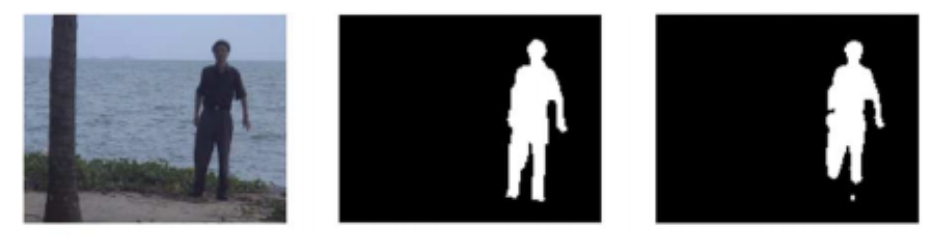
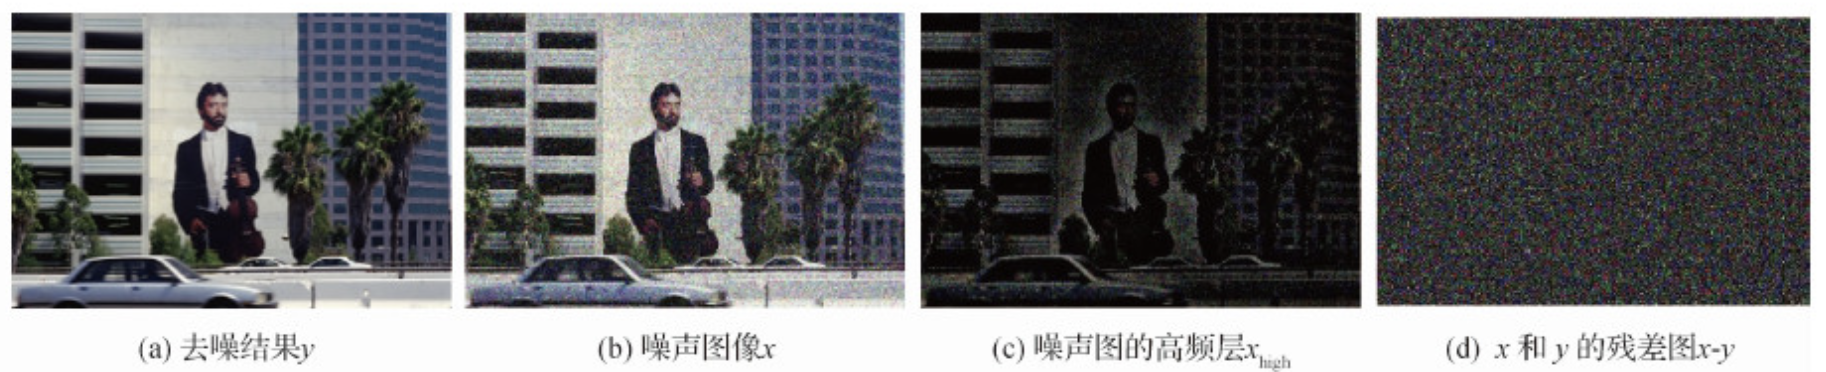

例如，我们可以将不同质量参数的jpeg图像相减，以直观的体验到不同质量图像的差距

In [4]:
# 读取图像
import cv2
import numpy as np

img_90 = cv2.imread('../../dataset/lena_90.jpg')
img_60 = cv2.imread('../../dataset/lena_60.jpg')

img_90 = cv2.cvtColor(img_90, cv2.COLOR_BGR2GRAY)
img_60 = cv2.cvtColor(img_60, cv2.COLOR_BGR2GRAY)

print(img_90.shape, img_60.shape)

# 获得残差

residual_img = img_90 - img_60

(512, 512) (512, 512)


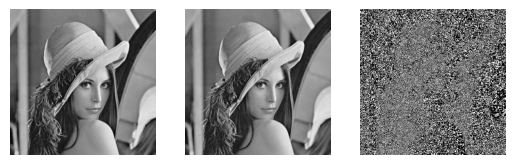

In [5]:
# 显示图像

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.imshow(img_90, cmap='gray')
ax2.imshow(img_60, cmap='gray')
ax3.imshow(residual_img, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()


图像的加法则常常用于图像融合或图像混合，将两张图像加权平均，可以实现图像的融合。

比如，红外图像与可见光图像，通过加权后，就可以实现简单的图像融合。

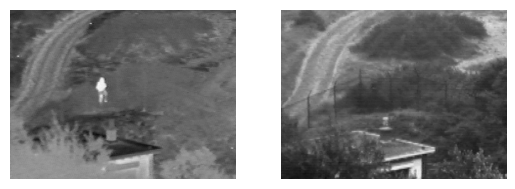

In [7]:
infrad_img = cv2.imread('../../dataset/1808i.bmp')
visual_img = cv2.imread('../../dataset/1808v.bmp')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.imshow(infrad_img, cmap='gray')
ax2.imshow(visual_img, cmap='gray')
ax1.axis('off')
ax2.axis('off')

plt.show()

进行简单的1:1加权，就可以得到融合后的图像。

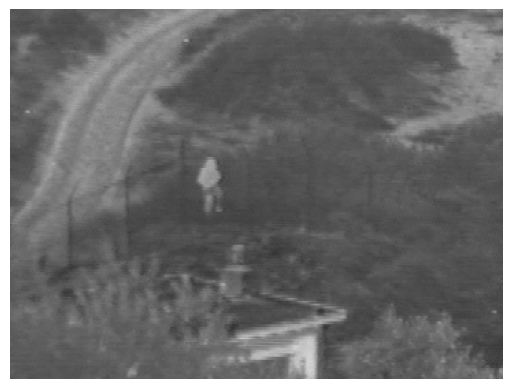

In [8]:
fused_img = 0.5 * infrad_img + 0.5 * visual_img
fused_img = fused_img.astype(np.uint8)

plt.imshow(fused_img)
plt.axis('off')
plt.show()

实际上，opencv提供了更加方便的图像相加工具，即`cv2.addWweighted(img1, alpha, img2, beta, 0)`

其参数的意义为：
    - img1，img2:图像1和图像2
    - alpha，beta：图像1和2的系数
    - 最后一个参数为亮度调节
    
因此，上述融合过程可以通过以下方式实现：

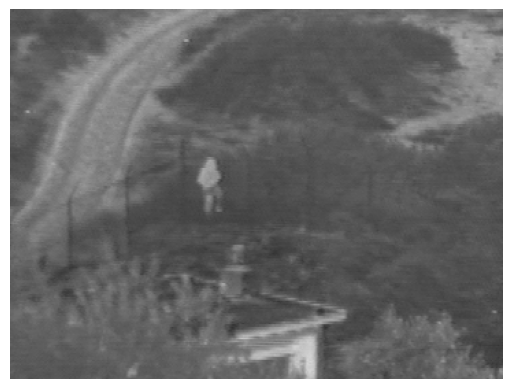

In [9]:
fused_img = cv2.addWeighted(infrad_img, 0.5, visual_img, 0.5, 0)
plt.imshow(fused_img)
plt.axis('off')
plt.show()

当然，这只是最基本的图像融合方法，关于图像融合，会在后续章节对经典方法进行简单的介绍。

#### 图像的逻辑运算

图像的逻辑运算在不同场景中，有不同的物理意义。

此处以增加饱和度为例，解释图像逻辑运算的过程。

除rgb颜色空间外，hsv也是重要的颜色空间表达。

* H:色调
* s:饱和度
* v:亮度

hsv更符合人类感知颜色的方式，更长用于设计领域。

opencv提供了rgb图像向hsv图像转换的接口

In [10]:
img = cv2.imread('../../dataset/degrade_lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

print(img[:3, :3, :3])
print('==================')
print(img_hsv[:3, :3, :3])

[[[226 169 160]
  [226 169 160]
  [223 169 167]]

 [[226 169 160]
  [226 169 160]
  [223 169 167]]

 [[226 169 160]
  [226 169 160]
  [223 169 167]]]
[[[  4  74 226]
  [  4  74 226]
  [  1  64 223]]

 [[  4  74 226]
  [  4  74 226]
  [  1  64 223]]

 [[  4  74 226]
  [  4  74 226]
  [  1  64 223]]]


RGB转HSV的公式为：

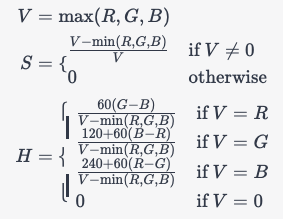


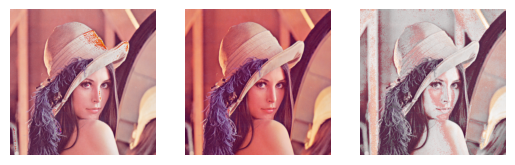

In [11]:
ref_img = cv2.imread('../../dataset/lena.png')
ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)
ref_hsv = cv2.cvtColor(ref_img, cv2.COLOR_RGB2HSV)

enhanced_hsv = img_hsv.copy()
enhanced_hsv[:, :, 1] = cv2.bitwise_and(img_hsv[:, :, 1], ref_hsv[:, :, 1])
enhanced_img = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2RGB)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.imshow(img)
ax2.imshow(ref_img)
ax3.imshow(enhanced_img)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()

除了增强对比度之外，逻辑运算还有其他的物理意义。

#### 二值化

二值化的图像往往是要对图像进行分割，通过阈值的区分，来实现物体分割

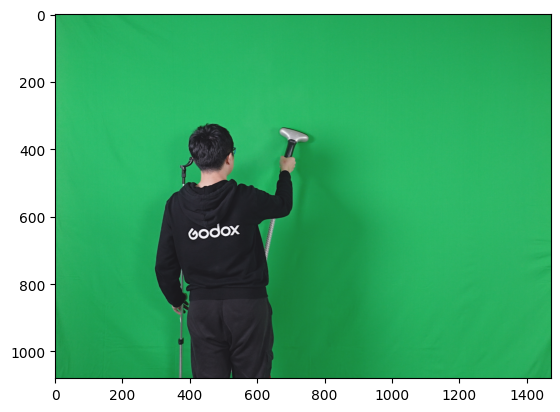

In [13]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../../dataset/greenscreen.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

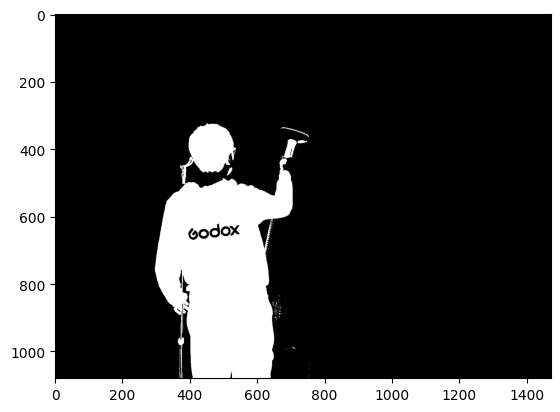

In [48]:
gray = img[:, :, 1]
# ret, thresh = cv2.threshold(green_channle, 40, 130, cv2.THRESH_BINARY)

thresh1 = np.where(gray < 130, 255, 0)
plt.imshow(thresh1, cmap='gray')
plt.show()

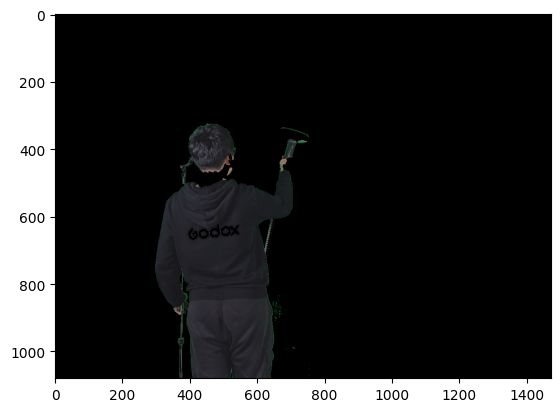

In [51]:
img[thresh1 == 0] = 0
plt.imshow(img)
plt.show()

#### 取反

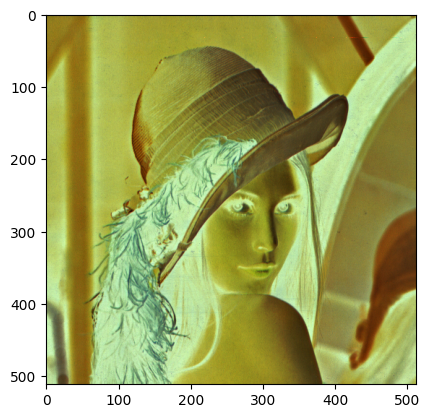

In [57]:
import cv2

img = cv2.imread('../../dataset/lena.bmp')
neg = cv2.bitwise_not(img)
plt.imshow(neg)
plt.show()